In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import joblib

In [4]:
import sklearn

print(sklearn.__version__)

1.2.1


In [5]:
df = pd.read_csv("G:/Study material/Data Science/Projects/Zomato/zomato.csv")

df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df.shape

(51717, 17)

## Delete the columns which are not important for analysis

In [7]:
qualitative_columns = ["url", "address","phone","reviews_list","dish_liked", "cuisines","menu_item","location"]

df.drop(qualitative_columns, axis=1, inplace=True)

df.head()

,name,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,600,Buffet,Banashankari


In [8]:
df.rename(columns={"approx_cost(for two people)":"price","listed_in(type)":"type","listed_in(city)":"location"},
         inplace=True)

df.head()

,name,online_order,book_table,rate,votes,rest_type,price,type,location
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,600,Buffet,Banashankari


In [9]:
df.drop("name", axis=1, inplace=True)

df.head()

,online_order,book_table,rate,votes,rest_type,price,type,location
0,Yes,Yes,4.1/5,775,Casual Dining,800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,600,Buffet,Banashankari


## Clean the data

In [10]:
df["online_order"].value_counts()

online_order
Yes    30444
No     21273
Name: count, dtype: int64

In [11]:
df["book_table"].value_counts()

book_table
No     45268
Yes     6449
Name: count, dtype: int64

In [12]:
df["rate"].value_counts()

rate
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: count, Length: 64, dtype: int64

In [13]:
df["rate"] = df["rate"].str.split('/').str[0]

df.head()

,online_order,book_table,rate,votes,rest_type,price,type,location
0,Yes,Yes,4.1,775,Casual Dining,800,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,800,Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining",800,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,300,Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,600,Buffet,Banashankari


In [14]:
df["rest_type"].value_counts()

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [15]:
df["rest_type"].str.split(",").str[0].nunique()

23

In [16]:
df["rest_type"].str.split(",").str[0].value_counts()

rest_type
Quick Bites       19521
Casual Dining     12026
Cafe               4364
Dessert Parlor     2744
Delivery           2604
Takeaway           2157
Bakery             1689
Beverage Shop      1272
Bar                1155
Pub                 776
Food Court          740
Sweet Shop          647
Lounge              501
Fine Dining         405
Mess                270
Microbrewery        226
Kiosk               176
Food Truck           84
Confectionery        47
Club                 41
Dhaba                40
Bhojanalya            3
Pop Up                2
Name: count, dtype: int64

In [17]:
df["rest_type"] = df["rest_type"].str.split(",").str[0]

df["rest_type"].value_counts()

rest_type
Quick Bites       19521
Casual Dining     12026
Cafe               4364
Dessert Parlor     2744
Delivery           2604
Takeaway           2157
Bakery             1689
Beverage Shop      1272
Bar                1155
Pub                 776
Food Court          740
Sweet Shop          647
Lounge              501
Fine Dining         405
Mess                270
Microbrewery        226
Kiosk               176
Food Truck           84
Confectionery        47
Club                 41
Dhaba                40
Bhojanalya            3
Pop Up                2
Name: count, dtype: int64

In [18]:
df["rest_type"] = df["rest_type"].str.replace("Bhojanalya","Mess")
df["rest_type"] = df["rest_type"].str.replace("Confectionery","Sweet Shop")
df["rest_type"] = df["rest_type"].str.replace("Food Truck","Kiosk")

df["rest_type"].value_counts()

rest_type
Quick Bites       19521
Casual Dining     12026
Cafe               4364
Dessert Parlor     2744
Delivery           2604
Takeaway           2157
Bakery             1689
Beverage Shop      1272
Bar                1155
Pub                 776
Food Court          740
Sweet Shop          694
Lounge              501
Fine Dining         405
Mess                273
Kiosk               260
Microbrewery        226
Club                 41
Dhaba                40
Pop Up                2
Name: count, dtype: int64

In [19]:
df.drop(df.loc[df["rest_type"] == "Pop Up"].index, axis=0, inplace=True)
df["rest_type"].value_counts()

rest_type
Quick Bites       19521
Casual Dining     12026
Cafe               4364
Dessert Parlor     2744
Delivery           2604
Takeaway           2157
Bakery             1689
Beverage Shop      1272
Bar                1155
Pub                 776
Food Court          740
Sweet Shop          694
Lounge              501
Fine Dining         405
Mess                273
Kiosk               260
Microbrewery        226
Club                 41
Dhaba                40
Name: count, dtype: int64

In [20]:
df.head()

,online_order,book_table,rate,votes,rest_type,price,type,location
0,Yes,Yes,4.1,775,Casual Dining,800,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,800,Buffet,Banashankari
2,Yes,No,3.8,918,Cafe,800,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,300,Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,600,Buffet,Banashankari


In [21]:
df["type"].value_counts()

type
Delivery              25942
Dine-out              17779
Desserts               3591
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: count, dtype: int64

In [22]:
df["location"].value_counts()

location
BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1619
Bannerghatta Road        1617
Brookefield              1517
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: count, dtype: int64

In [23]:
replace_dict = {"Koramangala 7th Block":"Koramangala", "Koramangala 4th Block":"Koramangala", 
                "Koramangala 5th Block":"Koramangala", "Koramangala 6th Block":"Koramangala"}

df["location"] = df["location"].replace(replace_dict)

df["location"].value_counts()

location
Koramangala          11176
BTM                   3279
Jayanagar             2371
JP Nagar              2096
Indiranagar           1860
Church Street         1827
MG Road               1811
Brigade Road          1769
Lavelle Road          1744
HSR                   1741
Marathahalli          1659
Residency Road        1620
Whitefield            1619
Bannerghatta Road     1617
Brookefield           1517
Old Airport Road      1425
Kammanahalli          1329
Kalyan Nagar          1309
Basavanagudi          1266
Sarjapur Road         1261
Electronic City       1229
Bellandur             1227
Frazer Town           1185
Malleshwaram          1096
Rajajinagar           1079
Banashankari           863
New BEL Road           740
Name: count, dtype: int64

In [24]:
df.head()

,online_order,book_table,rate,votes,rest_type,price,type,location
0,Yes,Yes,4.1,775,Casual Dining,800,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,800,Buffet,Banashankari
2,Yes,No,3.8,918,Cafe,800,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,300,Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,600,Buffet,Banashankari


In [25]:
df.isna().sum()

online_order       0
book_table         0
rate            7773
votes              0
rest_type        227
price            346
type               0
location           0
dtype: int64

In [26]:
df.dropna(inplace=True)

In [27]:
df.drop(df.loc[df["rate"]=="NEW"].index, axis=0, inplace=True)

In [28]:
df.drop(df.loc[df["rate"]=="-"].index, axis=0, inplace=True)

In [29]:
df["price"] = df["price"].str.replace(",", "")

In [30]:
df["rate"] = df["rate"].astype("float32")
df["price"] = df["price"].astype("int64")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41271 entries, 0 to 51716
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  41271 non-null  object 
 1   book_table    41271 non-null  object 
 2   rate          41271 non-null  float32
 3   votes         41271 non-null  int64  
 4   rest_type     41271 non-null  object 
 5   price         41271 non-null  int64  
 6   type          41271 non-null  object 
 7   location      41271 non-null  object 
dtypes: float32(1), int64(2), object(5)
memory usage: 2.7+ MB


## EDA

### price

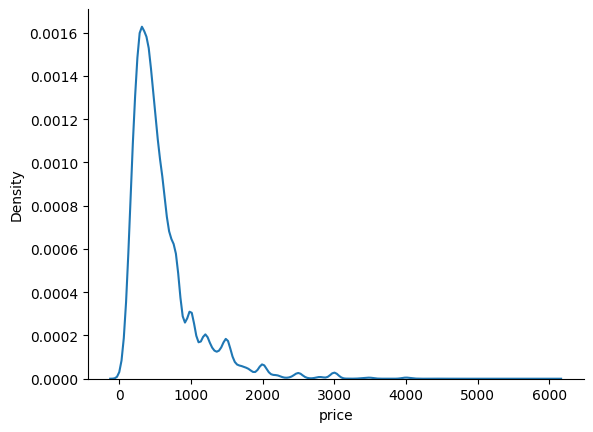

In [32]:
sns.kdeplot(df["price"])

sns.despine()

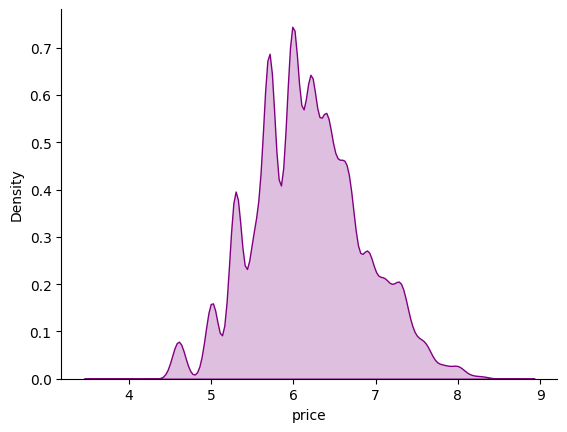

In [33]:
sns.kdeplot(np.log(df["price"]), fill=True, color="purple")

sns.despine()

### Online_order

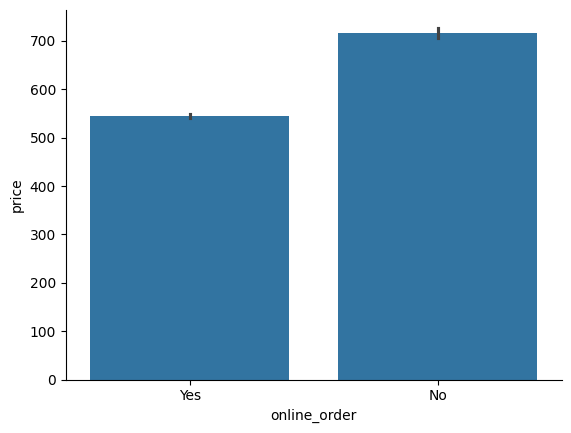

In [34]:
sns.barplot(x="online_order", y="price", data=df)

sns.despine()

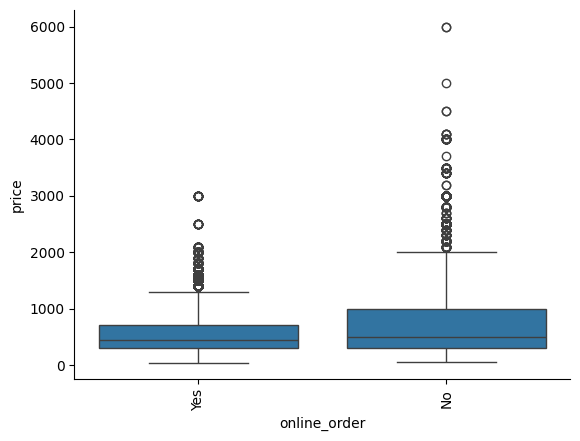

In [35]:
sns.boxplot(x="online_order", y="price", data=df)
plt.xticks(rotation=90)

sns.despine()

### book_table

In [36]:
df["book_table"].value_counts()

book_table
No     34967
Yes     6304
Name: count, dtype: int64

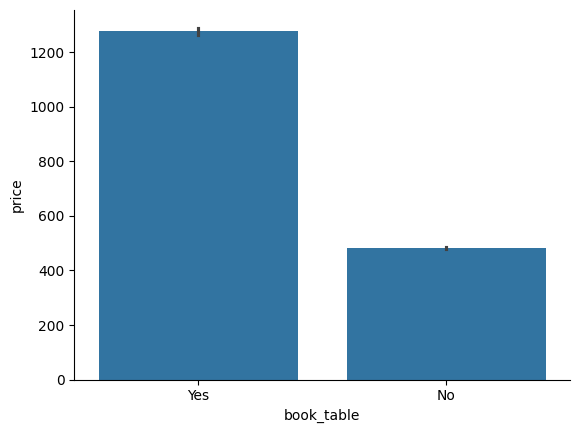

In [37]:
sns.barplot(x="book_table", y="price", data=df)

sns.despine()

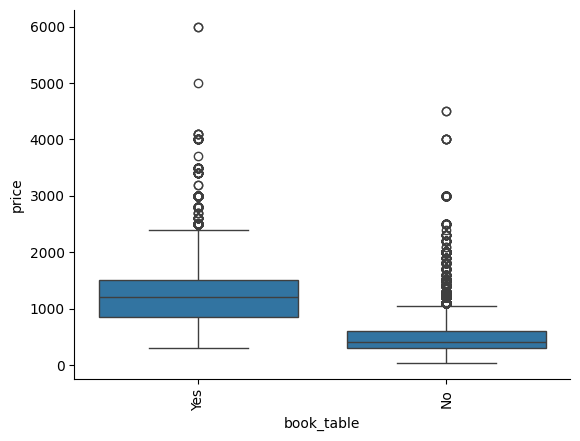

In [38]:
sns.boxplot(x="book_table", y="price", data=df)
plt.xticks(rotation=90)

sns.despine()

### Rate

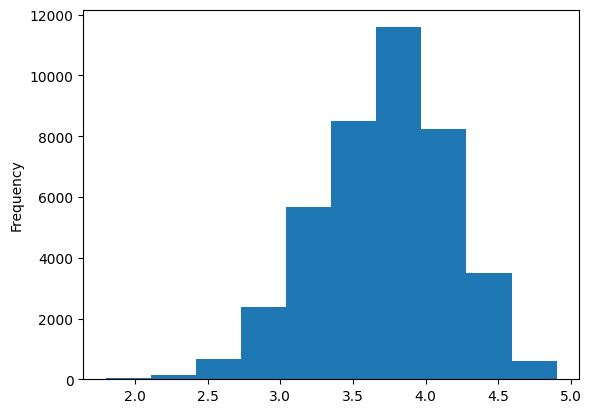

In [39]:
df["rate"].plot.hist();

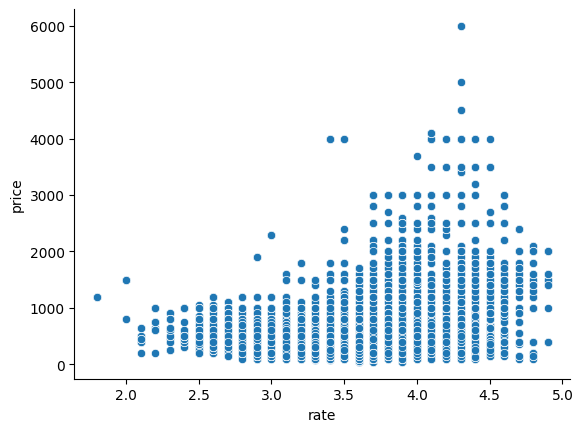

In [40]:
sns.scatterplot(x="rate", y="price", data=df)

sns.despine()

In [41]:
df["rate"].corr(df["price"]).round(2)

0.39

In [42]:
df["rate"].corr(np.log(df["price"])).round(2)

0.37

### Votes

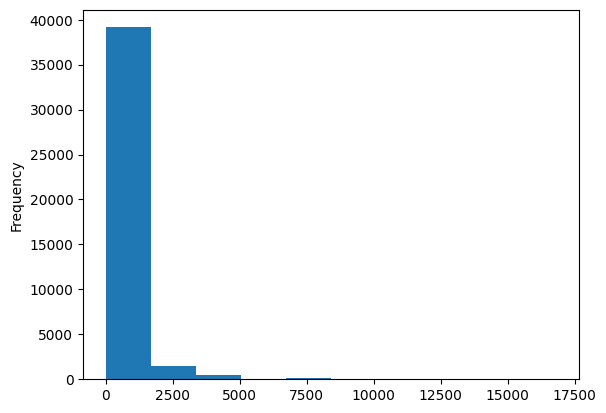

In [43]:
df["votes"].plot.hist();

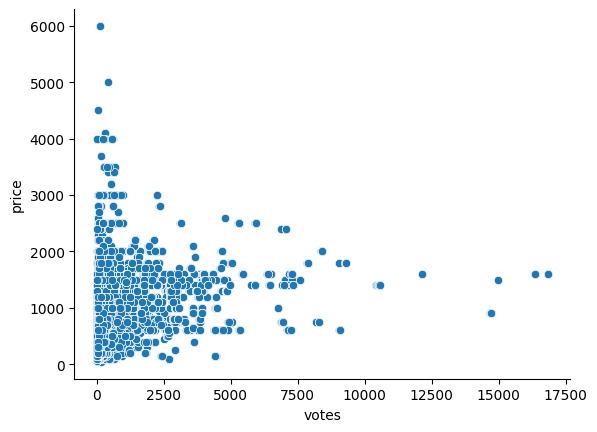

In [44]:
sns.scatterplot(x="votes", y="price", data=df)

sns.despine()

In [45]:
df["votes"].quantile(0.75) - df["votes"].quantile(0.25)

256.0

In [46]:
def outlier_treatment(data, variable, fold):
    IQR = df["votes"].quantile(0.75) - df["votes"].quantile(0.25)
    lower_limit = df["votes"].quantile(0.25) - (IQR * fold)
    upper_limit = df["votes"].quantile(0.75) + (IQR * fold)
    
    return lower_limit, upper_limit

In [47]:
lower_limit, upper_limit = outlier_treatment(df, "votes", 5)

lower_limit, upper_limit

(-1259.0, 1557.0)

In [48]:
def find_limit(data, variable):
    lower_limit = df["votes"].quantile(0.05)
    upper_limit = df["votes"].quantile(0.95)
    
    return lower_limit, upper_limit 

In [49]:
lower_limit, upper_limit = find_limit(df, "votes")
lower_limit, upper_limit

(6.0, 1706.0)

In [50]:
inlier = df["votes"].ge(lower_limit)

df = df.loc[inlier]

df.shape

(39456, 8)

In [51]:
inlier = df["votes"].le(upper_limit)

df = df.loc[inlier]

df.shape

(37396, 8)

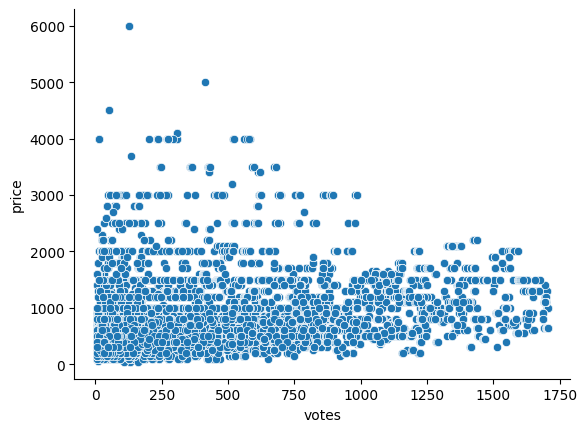

In [52]:
sns.scatterplot(x="votes", y="price", data=df)

sns.despine()

In [53]:
df["votes"].corr(df["price"])

0.3999516526573937

In [54]:
df["votes"].corr(np.log(df["price"])).round(2)

0.43

### Rest_type

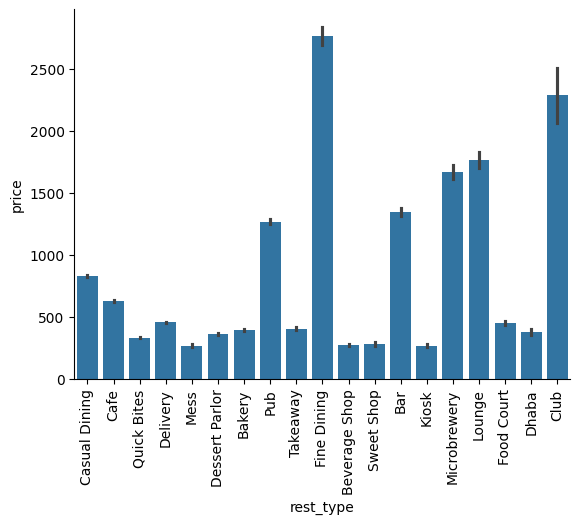

In [55]:
sns.barplot(x="rest_type", y="price", data=df)
plt.xticks(rotation=90)

sns.despine()

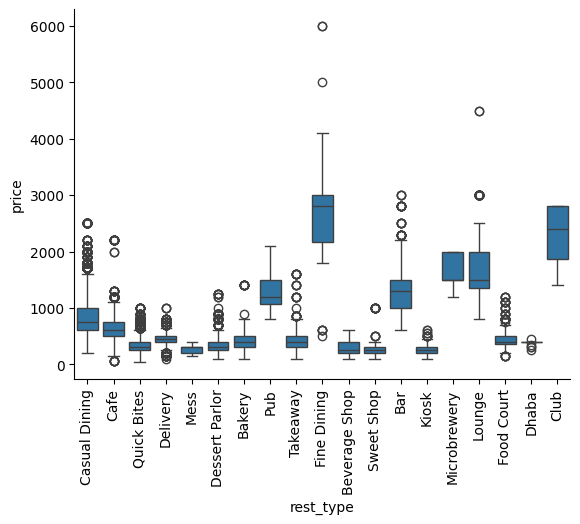

In [56]:
sns.boxplot(x="rest_type", y="price", data=df)
plt.xticks(rotation=90)

sns.despine()

## Type

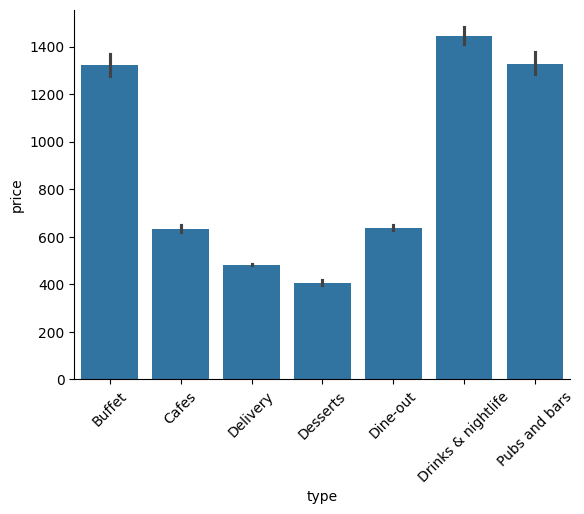

In [57]:
sns.barplot(x="type", y="price", data=df)
plt.xticks(rotation=45)

sns.despine()

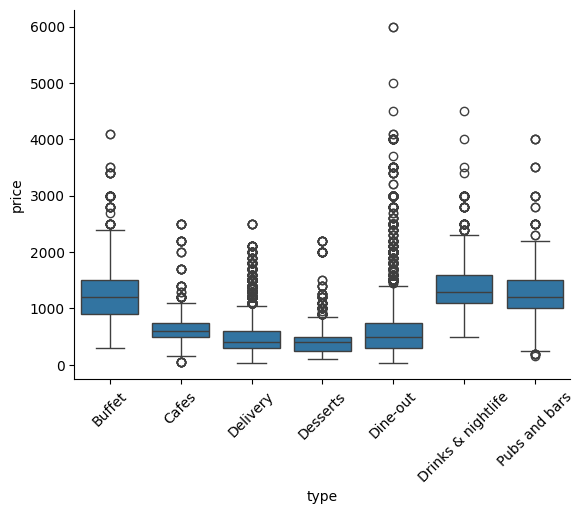

In [58]:
sns.boxplot(x="type", y="price", data=df)
plt.xticks(rotation=45)

sns.despine()

### Location

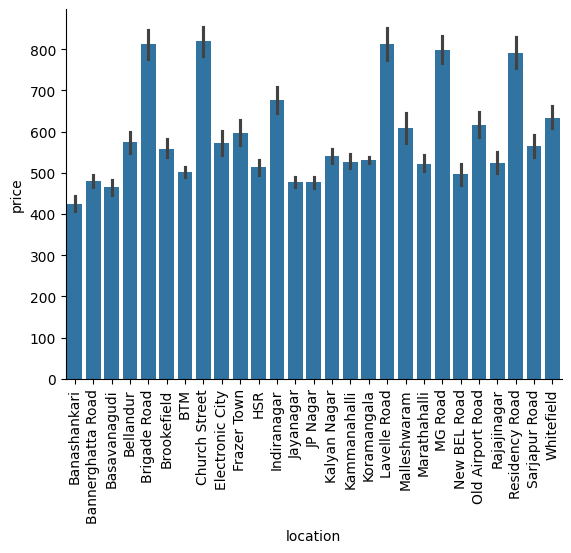

In [59]:
sns.barplot(x="location", y="price", data=df)
plt.xticks(rotation=90)

sns.despine()

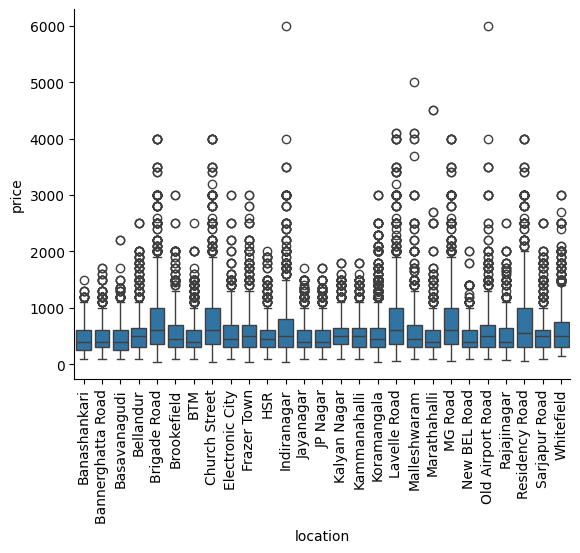

In [60]:
sns.boxplot(x="location", y="price", data=df)
plt.xticks(rotation=90)

sns.despine()

In [61]:
df.head()

,online_order,book_table,rate,votes,rest_type,price,type,location
0,Yes,Yes,4.1,775,Casual Dining,800,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,800,Buffet,Banashankari
2,Yes,No,3.8,918,Cafe,800,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,300,Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,600,Buffet,Banashankari


In [62]:
 df.to_csv('zomato.csv', index=False)

## Data Split

In [63]:
X = df.drop("price", axis=1)
y=df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape

((29916, 7), (29916,))

In [64]:
X_train.head()

,online_order,book_table,rate,votes,rest_type,type,location
27176,Yes,No,3.9,393,Casual Dining,Delivery,Koramangala
27915,No,No,3.6,61,Cafe,Delivery,Koramangala
19187,Yes,No,3.5,7,Quick Bites,Dine-out,Indiranagar
21050,Yes,No,4.0,169,Casual Dining,Dine-out,Jayanagar
15210,Yes,Yes,4.0,188,Casual Dining,Delivery,Frazer Town


In [65]:
X_test.head()

,online_order,book_table,rate,votes,rest_type,type,location
14199,No,No,3.1,10,Casual Dining,Dine-out,Electronic City
18702,No,Yes,4.2,902,Casual Dining,Dine-out,Indiranagar
6420,No,No,3.5,11,Quick Bites,Dine-out,Brigade Road
20286,Yes,No,4.4,181,Beverage Shop,Delivery,Jayanagar
4548,No,Yes,4.2,271,Casual Dining,Dine-out,Bellandur


## Data Preprocessing

In [66]:
cat_cols = X_train.select_dtypes(include="O").columns
num_cols = X_train.select_dtypes(exclude="O").columns

num_cols

Index(['rate', 'votes'], dtype='object')

In [67]:
num_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore", drop="first"))
])

In [68]:
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)
])

In [69]:
preprocessor.fit_transform(X_train)

array([[ 0.50199807,  0.61686762,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.20703423, -0.47009902,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.44337796, -0.64689479,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.67972168, -0.64689479,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26565378, -0.38497512,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50199807,  0.41387988,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [70]:
preprocessor.fit_transform(X_train).shape

(29916, 54)

## Model Selection

In [71]:
algorithms = {
    "lr":LinearRegression(),
    "dt":DecisionTreeRegressor(max_depth=10),
    "rf":RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
}

### Random Forest

In [72]:
model_rf = Pipeline(steps=[
    ("pre", preprocessor),
    ("rf", RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
])

In [73]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['rate', 'votes'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['online_order', 'book_table', 'rest_type', 'type', 'location'], dtype='object'))])),
                ('rf', RandomForestRegressor(max_depth=10, random_state=42))])

In [74]:
def model_evalution_rf(X, y):
    y_prep = model_rf.predict(X)
    return r2_score(y, y_prep)

In [75]:
print(f"r2_score for training data: {model_evalution_rf(X_train, y_train)}")

r2_score for training data: 0.8417741556015552


In [76]:
print(f"r2_score for training data: {model_evalution_rf(X_test, y_test)}")

r2_score for training data: 0.8202809003325006


### Linear Regression

In [77]:
model_lr = Pipeline(steps=[
    ("pre", preprocessor),
    ("lr", LinearRegression())
])

In [78]:
model_lr.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['rate', 'votes'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['online_order', 'book_table', 'rest_type', 'type', 'location'], dtype='object'))])),
                ('lr', LinearRegression())])

In [79]:
def model_evalution_lr(X, y):
    y_prep = model_lr.predict(X)
    return r2_score(y, y_prep)

In [80]:
print(f"r2_score for training data: {model_evalution_lr(X_train, y_train)}")

r2_score for training data: 0.7432013815859175


In [81]:
print(f"r2_score for training data: {model_evalution_lr(X_test, y_test)}")

r2_score for training data: 0.7373468313732494


### Decision Tree

In [82]:
model_dt = Pipeline(steps=[
    ("pre", preprocessor),
    ("dt", DecisionTreeRegressor(max_depth=10))
])

In [83]:
model_dt.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['rate', 'votes'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['online_order', 'book_table', 'rest_type', 'type', 'location'], dtype='object'))])),
                ('dt', DecisionTreeRegressor(max_depth=10))])

In [84]:
def model_evalution_dt(X, y):
    y_prep = model_dt.predict(X)
    return r2_score(y, y_prep)

In [85]:
print(f"r2_score for training data: {model_evalution_dt(X_train, y_train)}")

r2_score for training data: 0.8288083069871777


In [86]:
print(f"r2_score for training data: {model_evalution_dt(X_test, y_test)}")

r2_score for training data: 0.8043753151531421


## Model Persistence

In [87]:
joblib.dump(model_rf, "model1.joblib")

['model1.joblib']

In [88]:
saved_model = joblib.load("model1.joblib")
saved_model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['rate', 'votes'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['online_order', 'book_table', 'rest_type', 'type', 'location'], dtype='object'))])),
                ('rf', RandomForestRegressor(max_depth=10, random_state=42))])

In [89]:
saved_model.predict(X_test)

r2_score(y_test, model_rf.predict(X_test))

0.8202809003325006

In [92]:
import pandas
print(pandas.__version__)

2.2.2


In [93]:
import numpy
print(numpy.__version__)

1.26.4
